In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simularemos la evolución de p(x;t) para un sistema que evoluciona respecto a:
$$dX_t = (\alpha X_t + \beta X_t^3)dt + \sigma dB_t$$
con $\alpha, \beta, \sigma$ números reales. Así, la ecuación de Kolmogorov hacia adellante asociada al sistema es:
$$\frac{\partial p}{\partial t}(x;t) = -\frac{\partial }{\partial x}[(\alpha x+ \beta x^3)p(x;t)] + \frac{\sigma ^2}{2}\frac{\partial ^2}{\partial x^2}p(x;t)$$
Con condición inicial $\delta_0(x)$, en el $[-2,2]\times \{0\}$.\
Y condiciones de frontera $p(-2; t) = p(2;t) = 0$ para $0\leq t \leq 0.125$.

In [2]:
# Definimos el espacio y tiempo en el que trabajaremos
x1 = np.linspace(0,4,num = 41)
t1 = np.linspace(0,0.125,num = 21)
X1, T1 = np.meshgrid(x1,t1)

In [3]:
# Definimos los parametros para el ejemplo
alpha = -1
beta = -1
sigma = 1
x0 = 0

Sean $x_0 = -2, t_0 = 0, \Delta x = 0.1, \Delta t = 0.00625, x_i = -2 + i\Delta x, t_j = j\Delta t$ y por último, $p_{i,j} = p(x_i;t_j)$.\
Para resolver la EDP de manera numérica, usaremos la siguiente ecuación en differencias:
$$\frac{p_{i,j+1}-p_{i,j}}{\Delta t} = -(\alpha + 3\beta x_i^2)p_{i,j} - (\alpha x_i + \beta x_i^3)\frac{p_{i+1,j} - p_{i-1,j}}{2\Delta x} + \frac{\sigma^2}{2}\frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{(\Delta x)^2}$$

In [4]:
# Funcion que calcula la evolucion de p(x;t) respecto a la evolucion dada
def fokker_planck(a, b, s, d_inicial, x, t):
    # Hacemos una matriz de ceros que para cada xi, tj 
    p = np.zeros([len(x), len(t)])
    # Determinamos el tamanio de paso en x y en t
    delta_x = x[1] - x[0]
    delta_t = t[1] - t[0]
    # Definimos la condicion inicial
    p[:,0] = d_inicial
    # Para cada tiempo menos el ultimo
    for j in range(len(t)-1):
        # Para cada x excepto en los bordes
        for i in range(1, len(x)-1):
            # Calculamos el valor del cambio de la ec en diferencias
            dij = -(a + 3*b*(x[i]-2)**2)*p[i,j] - (a*(x[i]-2)+b*(x[i]-2)**3)*(p[i+1,j]-p[i-1,j])/(2*delta_x) + (s**2)/2 * (p[i+1,j] - 2*p[i,j] + p[i-1,j])/(delta_x**2)
            # Incrementamos en el tiempo
            p[i,j+1] += p[i,j] + dij * delta_t
    return p

In [5]:
# Funcion que calcula un simil de delta de dirac centrada en x0 como condicion inicial
def d_inicial(x, x0):
    p = []
    for i in range(len(x)):
        # Si encontramos x0, insertamos un numero comicamente grande
        if x[i] == x0:
            p.append(1e10)
        # Insertamos 0 e.o.c.
        else:
            p.append(0)
    return p

In [6]:
# Calculamos la distribucion inicial con nuestro intervalo y empezando en 2
d_inicial = d_inicial(x1, 2)

In [7]:
# Calculamos la solucion de la EDP
fk = fokker_planck(alpha,beta,sigma,d_inicial, x1, t1)

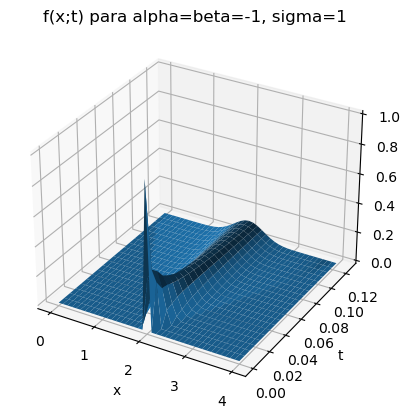

In [8]:
# Graficamos
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1,T1,fk.transpose())
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('f(x;t) para alpha=beta=-1, sigma=1')
plt.show()

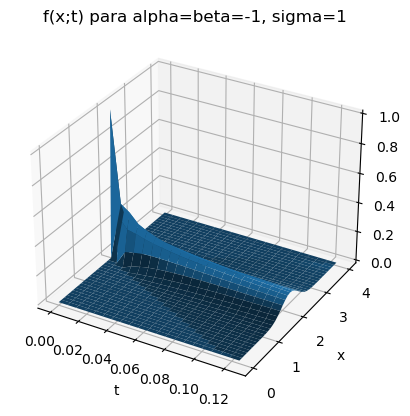

In [9]:
# Graficamos desde otro angulo
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T1,X1,fk.transpose())
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('f(x;t) para alpha=beta=-1, sigma=1')
plt.show()

Queremos estudiar cómo cambia la probabilidad de que la fuerza esté dentro de un conjunto D, en particular trabajaremos con $D=[1,3]$ para este ejemplo.

In [10]:
# Aprovechamos que la densidad la describimos con un conjunto discreto yla describimos como una masa
masa = np.copy(fk)
for i in range(fk.shape[1]):
    masa[:,i] /= np.sum(fk[:,i])

In [11]:
# Funcion que regresa un vector con las probabilidades aproximadas de que el sistema este en un intervalo dado
def pD(f,x, a,b):
    # Obtenemos las posiciones relativas de a y b en el vector del espacio
    posiciones = np.searchsorted(x, [a,b])
    # Guardamos la parte de la matriz que contiene a [a, b] y todos sus tiempos
    f_posiciones = np.copy(f[posiciones[0]:posiciones[1]+1, :])
    return np.sum(f_posiciones, axis = 0)

In [12]:
pD(masa,x1,1,3)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999831, 0.99999175, 0.99997604, 0.9999465 ,
       0.99989851, 0.99982796, 0.99973142, 0.99960629, 0.99945075,
       0.99926379])

In [13]:
# Analizaremos la evolucion en un lapso de tiempo mayor
t2 = np.linspace(0,1,161)

In [14]:
# Calculamos la solucion de la EDP
fk2 = fokker_planck(alpha,beta,sigma,d_inicial, x1, t2)

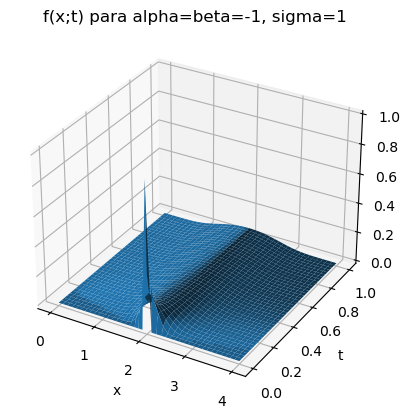

In [15]:
X2, T2 = np.meshgrid(x1, t2)
# Graficamos
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X2,T2,fk2.transpose())
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('f(x;t) para alpha=beta=-1, sigma=1')
plt.show()

In [16]:
# de nuevo, "discretizamos" la densidad
masa2 = np.copy(fk2)
for i in range(fk2.shape[1]):
    masa2[:,i] /= np.sum(fk2[:,i])

In [17]:
# Calculamos la probabilidad de que el sistema este en [1,3] para cada tiempo
pD1 = pD(masa2, x1, 1,3)

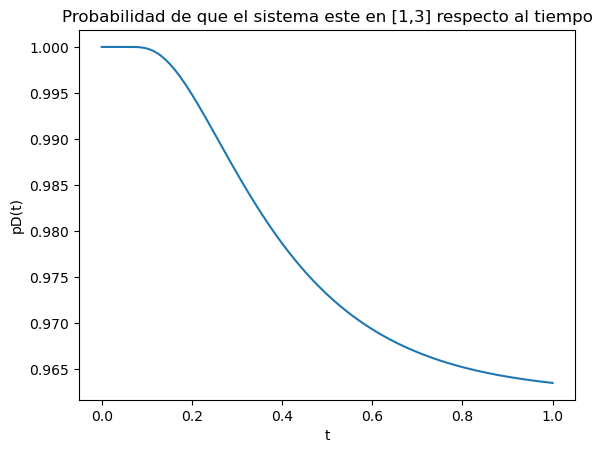

In [18]:
# Graficamos
plt.plot(t2, pD1)
plt.title("Probabilidad de que el sistema este en [1,3] respecto al tiempo")
plt.xlabel('t')
plt.ylabel('pD(t)')
plt.show()

In [19]:
# Ahora analizamos un conjunto mas pequenio, el intervalo [1.5, 2.5]
pD2 = pD(masa2, x1, 1.5,2.5)

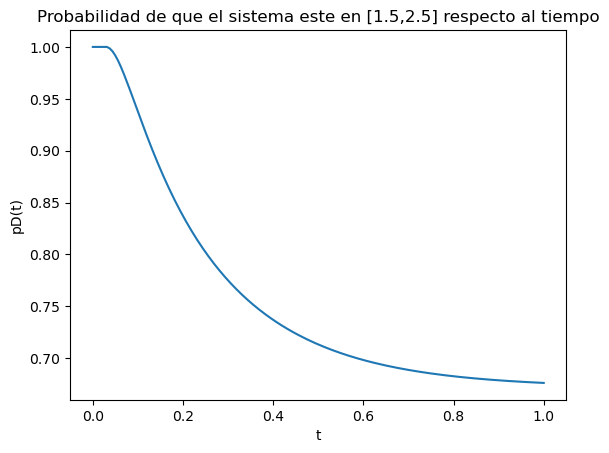

In [20]:
plt.plot(t2, pD2)
plt.title("Probabilidad de que el sistema este en [1.5,2.5] respecto al tiempo")
plt.xlabel('t')
plt.ylabel('pD(t)')
plt.show()